# IMPORTING LIBRARIES REQUIRED

In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# DATA ANALYSIS AND COLLECTION

In [2]:
df=pd.read_csv("data_medical_insurance.csv")

In [3]:
# first 5 rows of data set

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [5]:
# numbers of rows and columns 

In [6]:
df.shape

(2772, 7)

In [7]:
# getting some information abt the dataset

In [8]:
# 3 categorial factors 
#sex
#region 
#smoker
#target variable:charges
#we use distribution plot for non - categorical factors

In [9]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]>

In [10]:
#finding if there are any missing values 
#since it is a perfect data there are no missing values and its 0

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# it describes the statistical measures of the data like mean std and etc

In [13]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
# distribution of age column

/var/folders/k1/n739wh5n3135p5m1ktcbbs5m0000gn/T/ipykernel_21242/2601651256.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


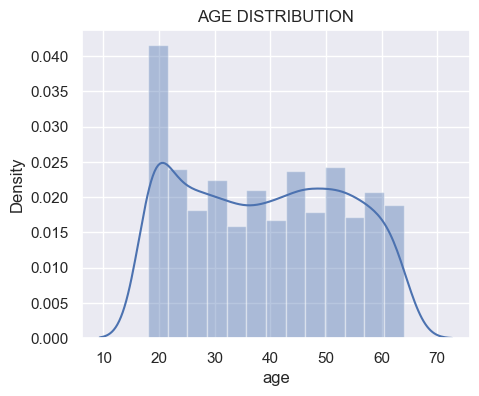

In [15]:
sns.set()
plt.figure(figsize=(5,4))
sns.distplot(df['age'])
plt.title("AGE DISTRIBUTION")
plt.show()

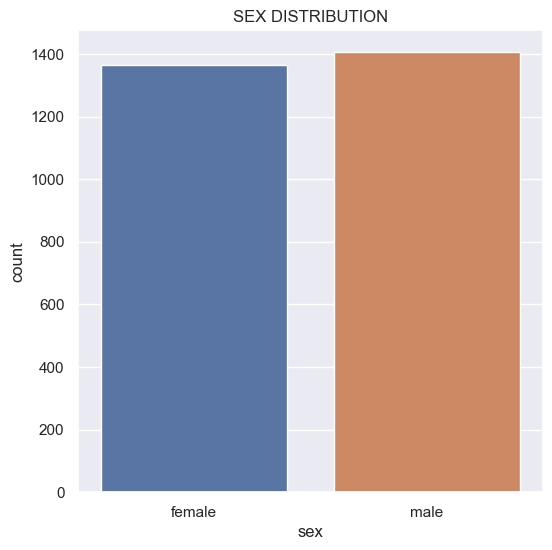

In [16]:
# distrubution for sex
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("SEX DISTRIBUTION")
plt.show()

In [17]:
df["sex"].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

In [18]:
# bmi distribution - if the person is overweight or under weight 
#normal bmi range - - > 18.5 - 24.9

/var/folders/k1/n739wh5n3135p5m1ktcbbs5m0000gn/T/ipykernel_21242/3173142581.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


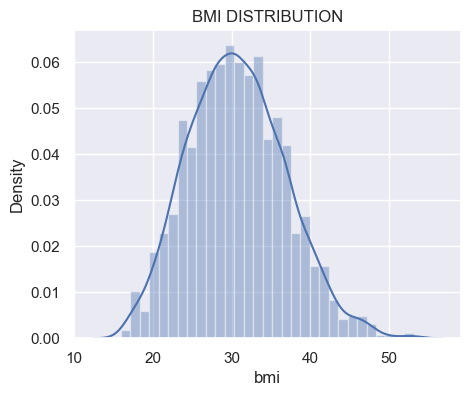

In [19]:
sns.set()
plt.figure(figsize=(5,4))
sns.distplot(df['bmi'])
plt.title("BMI DISTRIBUTION")
plt.show()

In [20]:
# most of them are overweight which effects the insurance charge

In [21]:
# we use count plot to distribute this data as they are hardly 5 numbers

Text(0.5, 1.0, 'CHILDREN DISTRIBUTION')

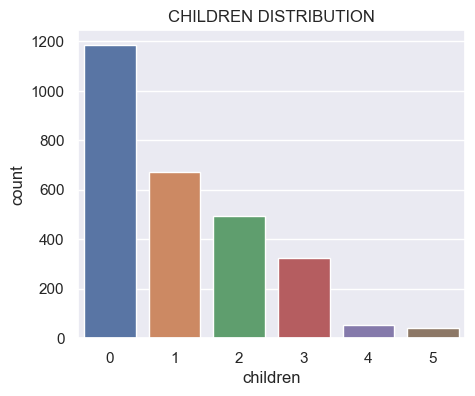

In [22]:
sns.set()
plt.figure(figsize=(5,4))
sns.countplot(x='children',data=df)
plt.title("CHILDREN DISTRIBUTION")

In [23]:
df["children"].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

Text(0.5, 1.0, 'SMOKER DISTRIBUTION')

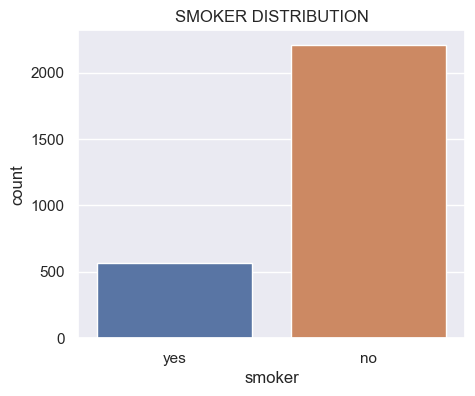

In [24]:
sns.set()
plt.figure(figsize=(5,4))
sns.countplot(x='smoker',data=df)
plt.title("SMOKER DISTRIBUTION")

In [25]:
df['smoker'].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

In [26]:
# it is important to understand the how this data is distributed in the data set gives a clear picture of vasitations in the data

Text(0.5, 1.0, 'REGION DISTRIBUTION')

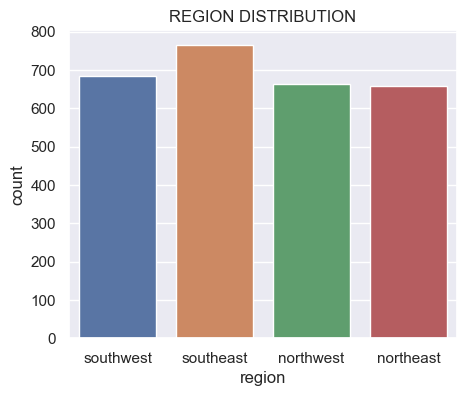

In [27]:
sns.set()
plt.figure(figsize=(5,4))
sns.countplot(x='region',data=df)
plt.title("REGION DISTRIBUTION")

In [28]:
df["region"].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

/var/folders/k1/n739wh5n3135p5m1ktcbbs5m0000gn/T/ipykernel_21242/767702020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


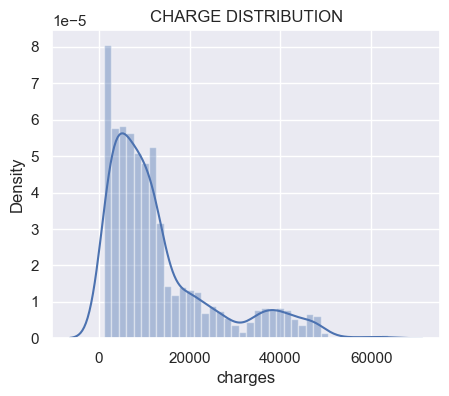

In [29]:
sns.set()
plt.figure(figsize=(5,4))
sns.distplot(df['charges'])
plt.title("CHARGE DISTRIBUTION")
plt.show()

# this the data analaysis part , we can understand how the data is distributed

# pre - processing data

In [30]:
# we know the categorical factors right - they are in text form 
#this ml doesnt take text data well so we have to convert the text data into numerical values

# encoding the categorical  features
## sex
## region
## smoker

In [31]:
# encoding sex column 
df.replace({'sex':{'male':0,'female':1}},inplace=True)
#encoding smoker column 
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
#encoding region column 
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

# splitting the features and target
### axis parameters
to remove a column axis is 1 
to remove a row axis is 0

In [32]:
X=df.drop(columns='charges',axis=1)
Y=df['charges']
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       1       0
2768   21    1  34.600         0       1       1
2769   19    0  26.030         1       0       3
2770   23    0  18.715         0       1       3
2771   54    0  31.600         0       1       1

[2772 rows x 6 columns]


In [33]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


In [34]:
#the x contains all the features except the target i.e cahrges 
# y contains only target data

# splitting data into testing data  and training data
20% is testing data and 80% is training data

In [35]:
# what is random state 
# random state - basically reproduce the same data 

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2217, 6) (555, 6) (2217,) (555,)


# model training 
linear regression -

In [37]:
# loading the linear regression model 
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

## MODEL EVALUATION
PREDICTION ON TRAINING DATA

In [38]:
training_data_prediction=regressor.predict(X_train)

In [39]:
# R squared value 
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print('R squared value',r2_train)

R squared value 0.7561940076387632


In [40]:
training_data_prediction=regressor.predict(X_test)[o]

NameError: name 'o' is not defined

In [ ]:
r2_test=metrics.r2_score(Y_test,training_data_prediction)
print('R squared value',r2_test)

In [ ]:
# why are we doing evaluation for even training data?
# overtraining in ml in this case model will over learn the data 
#for the good prformance and good fit 

# building a predicting system 

In [41]:
inp_data=(31,1,25.74,1,1,1)
# changing input data as numpy array 
inp_data_as_numpy_array=np.asarray(inp_data)
# reshape the data 
inp_data_reshaped=inp_data_as_numpy_array.reshape(1,-1)
#prediction 
prediction=regressor.predict(inp_data_reshaped)
print(prediction)
print('the insurance cost is USD',prediction[0])

[4330.41725226]
the insurance cost is USD 4330.417252262898


/Users/nityasahithi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
